In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#Define path
path = r'/Users/shikongo/Instacart Basket Analysis/'

In [4]:
path

'/Users/shikongo/Instacart Basket Analysis/'

In [5]:
df_customers_merged = pd.read_pickle(r'/Users/shikongo/Instacart Basket Analysis/02 Data/Prepared Data/order_product_customer_final_merge.pkl')

In [39]:
df_customers_merged = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'order_product_customer_final_merge.pkl'))

In [7]:
df_customers_merged.head()

,user_id,First Name,Surname,Gender,STATE,Age,number_dependents,family_status,income,Unnamed: 0_x,...,days_since_prior_order,ordr_id,add_to_cart_order,reordered,_merge,Busiest_period_of_day,max_order,loyalty_flag,spending_flag,frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665.0,195,...,30.0,2543867,2,0,both,Most_orders,8,New customer,Low spender,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665.0,195,...,11.0,1285508,1,1,both,Most_orders,8,New customer,Low spender,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665.0,195,...,10.0,2578584,2,1,both,Most_orders,8,New customer,Low spender,Regular customer
3,33890,Patricia,Hart,Female,New Mexico,36,0,single,59285.0,195,...,30.0,1044841,1,0,both,Most_orders,5,New customer,Low spender,Non-frequent customer
4,33890,Patricia,Hart,Female,New Mexico,36,0,single,59285.0,195,...,16.0,474720,6,1,both,Average_orders,5,New customer,Low spender,Non-frequent customer


In [8]:
#Show all columns
df_customers_merged.columns

Index(['user_id', 'First Name', 'Surname', 'Gender', 'STATE', 'Age',
       'number_dependents', 'family_status', 'income', 'Unnamed: 0_x',
       'product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'Unnamed: 0.1', 'Unnamed: 0_y', 'order_id', 'eval_set', 'order_number',
       'orders_day_of_wek', 'order_hour_of_day', 'days_since_prior_order',
       'ordr_id', 'add_to_cart_order', 'reordered', '_merge',
       'Busiest_period_of_day', 'max_order', 'loyalty_flag', 'spending_flag',
       'frequency_flag'],
      dtype='object')

# 1.Visualizations

1.1. Histogram: Finding about order hour of day sales

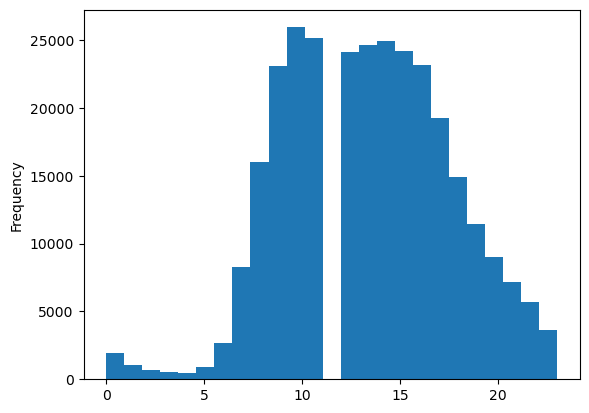

In [37]:
# Create a histogram of the "order_hour_of_day"
hist = df_customers_merged['order_hour_of_day'].plot.hist(bins = 25)
fig = hist.get_figure()
fig.savefig(os.path.join(path, 'hist.png'))

Describe histogram

Early Morning Orders (0:00AM to 5:00 AM): In the early hours of the morning (between midnight and 5:00 AM), 
there is a relatively low frequency of orders, with each hour having around 5000 orders. 
This suggests that most customers are not actively shopping during these hours.

Morning Peak (5:00 AM to 10:00 AM): Starting from around 5:00 AM, the frequency of orders starts to increase significantly,
peaking at 10:00 AM with approximately 80,000 orders. This peak indicates that many customers prefer to shop 
and place orders in the morning hours,possibly before starting their daily activities.

Noon to Afternoon Lull (11:00 AM to 12:00 PM): There appears to be a gap in the data between 11:00 AM and 12:00 PM, where no orders or very few orders are recorded.This might be due to a data anomaly or a period of reduced order activity.

Afternoon Peak (12:00 PM to 3:00 PM): Starting around noon and continuing until 3:00 PM, there is another peak in order frequency, 
reaching approximately 80,000 orders again. This suggests that many customers make purchases during their lunch break and early afternoon.

Gradual Decline (3:00 PM to 8:00 PM): After the afternoon peak, the frequency of orders gradually declines as the day progresses. 
By 8:00 PM, the number of orders has reduced to around 20,000, indicating that fewer customers are shopping in the evening hours.

This histogram provides insights into the daily order patterns, highlighting peak shopping times in the morning 
and early afternoon.Understanding these patterns can help Instacart optimize its operations, delivery schedules,
and marketing strategies to better serve customer needs.


In [10]:
# Descriptive findings about sales
df_customers_merged['order_hour_of_day'].describe()

count    1000000.000000
mean          13.395483
std            4.241583
min            0.000000
25%           10.000000
50%           13.000000
75%           16.000000
max           23.000000
Name: order_hour_of_day, dtype: float64

In [11]:
df_customers_merged['order_hour_of_day'].mean()

13.395483

In [12]:
df_customers_merged['order_hour_of_day'].median()

13.0

In [13]:
df_customers_merged['order_hour_of_day'].max()

23

1.2. Bar chart: Distribution of orders among customers in terms of loyality

In [38]:
df_customers_merged.columns

Index(['order_hour_of_day', 'prices'], dtype='object')

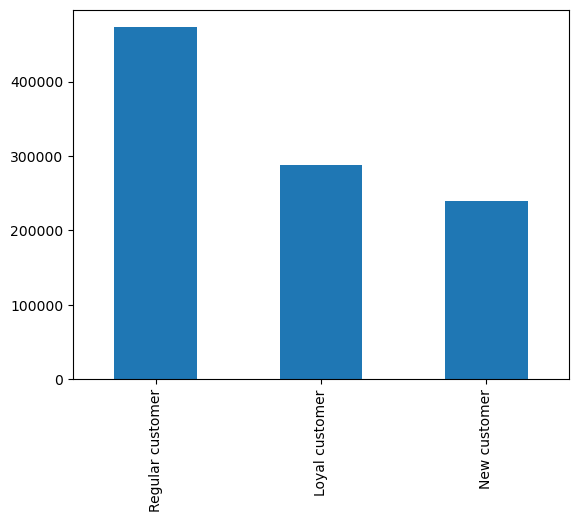

In [40]:
# Create a bar chart
bar = df_customers_merged['loyalty_flag'].value_counts().plot.bar()
fig = bar.get_figure()
fig.savefig(os.path.join(path, 'bar.png'))

Each bar in the chart corresponds to a loyalty category, and the height of the bar represents the number of orders for that category.
The chart will visually demonstrate the distribution of orders among customers with different loyalty statuses
with "Regular Customer" having the highest number of orders, followed by "Loyal Customer," 
and "New Customer" having the lowest number of orders.

1.3 Line chart: Difference in expenditure between prices and hour of the day.

In [15]:
# Create a sample 
np.random.seed(4)
dev =np.random.rand(len(df_customers_merged)) <=0.7

In [16]:
dev

array([False,  True, False, ..., False,  True, False])

In [17]:
np.random.rand(10)

array([0.14558531, 0.30956713, 0.87468615, 0.50287514, 0.38487566,
       0.60254022, 0.32412759, 0.65601576, 0.62784649, 0.42485982])

In [18]:
# Create a list holiding True/False values to the test np.random.rant() <= 0.7
dev = np.random.rand(len(df_customers_merged)) <= 0.7

In [19]:
# Store 70% of the sample in the dataframe big
big = df_customers_merged[dev]

In [20]:
# Store 30% of the sample in the dataframe small
small = df_customers_merged[~dev]

In [21]:
len(df_customers_merged)

1000000

In [22]:
len(big) + len(small)

1000000

In [23]:
df_customers_merged = small[['order_hour_of_day','prices']]

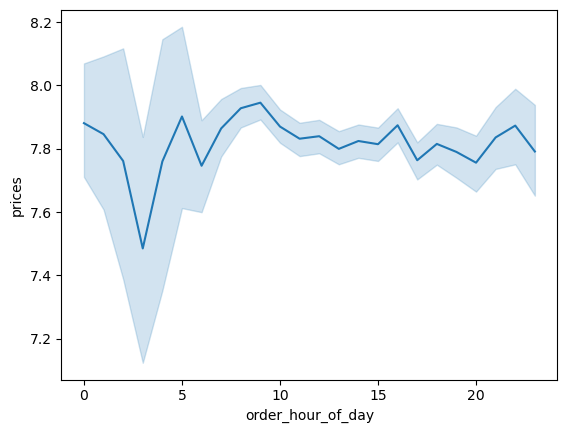

In [24]:
# With sample
line =sns.lineplot(data =df_customers_merged, x = 'order_hour_of_day', y = 'prices')

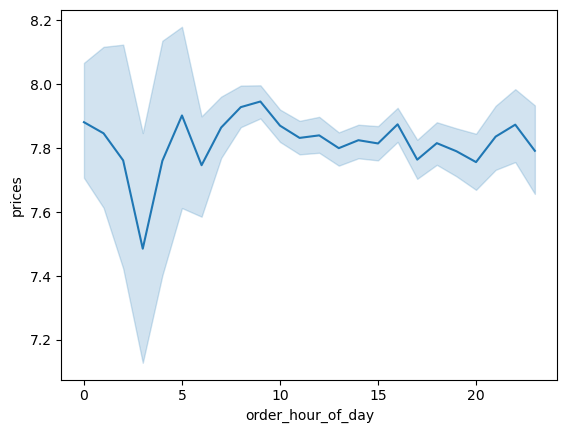

In [35]:
# With no sample
line = sns.lineplot(data = df_customers_merged, x = 'order_hour_of_day', y ='prices')
fig = line.get_figure()
fig.savefig(os.path.join(path, 'line.png'))

1.4. line chart: Analysis customer demographics: 

In [43]:
# To see all the columns that exist
df_customers_merged.columns

Index(['user_id', 'First Name', 'Surname', 'Gender', 'STATE', 'Age',
       'number_dependents', 'family_status', 'income', 'Unnamed: 0_x',
       'product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'Unnamed: 0.1', 'Unnamed: 0_y', 'order_id', 'eval_set', 'order_number',
       'orders_day_of_wek', 'order_hour_of_day', 'days_since_prior_order',
       'ordr_id', 'add_to_cart_order', 'reordered', '_merge',
       'Busiest_period_of_day', 'max_order', 'loyalty_flag', 'spending_flag',
       'frequency_flag'],
      dtype='object')

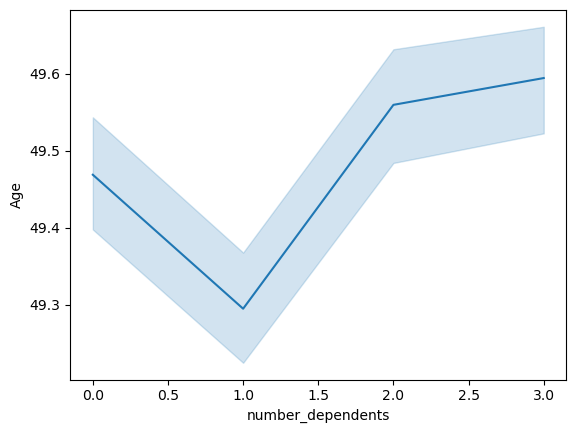

In [46]:
# Create a line a chart: number_dependents' 'Age'
line2 = sns.lineplot(data = df_customers_merged, y = 'Age', x= 'number_dependents')
fig = line2.get_figure()
fig.savefig(os.path.join(path, 'line2.png'))

At 0.0 dependents: The average age is approximately 49.5 years.
This suggests that individuals with no dependents tend to have an average age of around 49.5 years.

From 0.0 to 1.0 dependents: The average age slowly declines as the number of dependents increases slightly to 49.3 years.
This indicates that as people start having a small number of dependents, their average age decreases slightly.

From 1.0 dependents onward: The average age starts to rise rapidly as the number of dependents increases. 
By the time it reaches 2.0 dependents, the average age has exceeded 49.5 years, and it continues to rise further. At around 49.6 years of age, 
when there are 3.0 dependents, the average age is still increasing.

1.5. Scatterplot: Connection between age and spending power (income)

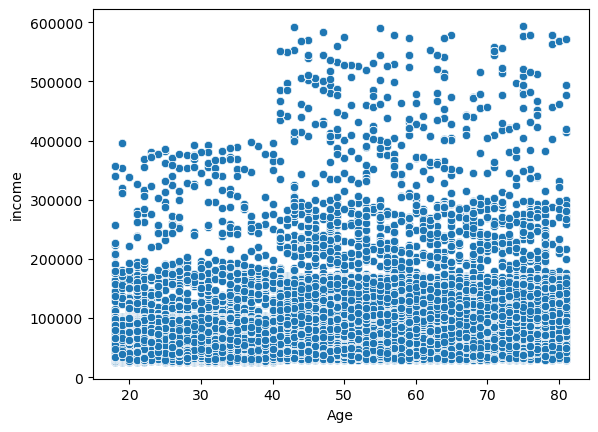

In [42]:
# Create a scatterplot
scatter = sns.scatterplot ( x = 'Age', y = 'income', data = df_customers_merged)
fig = scatter.get_figure()
fig.savefig(os.path.join(path, 'scatter.png'))

Describe what the scatterplic shows

20 to 80 Years with Income Between 100,000 and 200,000:
In the scatterplot, for individuals between the ages of 20 and 80 years who have incomes between 100,000 and 200,000,
the points are clustered closely together. This indicates that there are many individuals within this age and 
income range.

20 to 40 Years with Income Between 200,000 and 400,000:
Within the age range of 20 to 40 years, individuals with incomes between 200,000 and 400,000 have points
that are more spread out but still relatively close to each other. This suggests a relatively moderate 
variation in income within this age group 

50 to 80 Years with Income Between 200,000 and 300,000:
For individuals between the ages of 50 and 80 years who have incomes between 200,000 and 300,000, 
the scatterplot also shows points that are closely grouped together. This indicates a concentration of individuals
with similar income levels in this older age group.

20 to 40 Years with Income Between 400,000 and 600,000:
Interestingly, for individuals between the ages of 20 and 40 years who have incomes between 400,000 and 600,000, 
there are no visible data points (scatter). This could suggest that there might be very few individuals in this age
group with such high incomes, or there could be data limitations or outliers.

40 to 80 Years with Income Between 400,000 and 600,000:
Finally, for individuals aged 40 to 80 years with incomes between 400,000 and 600,000, 
the scatterplot again shows closely clustered points, indicating that there is a concentration of individuals 
with incomes within this range, especially in the later years of life.